In [11]:
import cantera as ct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.optimize import fmin

def getSSE(slope1, slope2):
    square_residual = (slope1 - slope2)**2.0
    sum_square_error = sum(square_residual)
    return sum_square_error

def fit2nd(params, theta):
    a, b = params
    BE = a*theta + b*theta**2
    return BE

def minimize_2nd(params, theta, BEs):
    BEs_predicted = fit2nd(params, theta)
    sse = getSSE(BEs_predicted, BEs)
    return sse


In [14]:
p=1 #pressure of the CSTR
cti_file = 'WGS_on_Rh_HRHT_flipped.yaml'
T=298.15

# import the gas model and set the initial conditions
gas = ct.Solution(cti_file, 'gas')
gas.TPX = T, p*ct.one_atm, 'N2:0.9602, CO:0.0159, H2O: 0.0239'

#import the (111) surface
surf = ct.Interface(cti_file,'Rh100', [gas])
surf.TP = T, p*ct.one_atm
surf.coverages = {'Rh(100)':1}


theta_co=np.linspace(0,1,10)

def covdep(a,b):
    h=np.zeros(len(theta_co))     
    
    for i in range(len(theta_co)):
        deltaEa=b+a*theta_co[i]
        if deltaEa<0:
            h[i]=0
        else:
            h[i]=deltaEa
    
    return h    


Optimization terminated successfully.
         Current function value: 0.003345
         Iterations: 55
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: 0.001587
         Iterations: 50
         Function evaluations: 97
Optimization terminated successfully.
         Current function value: 0.013779
         Iterations: 56
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 0.004347
         Iterations: 54
         Function evaluations: 101
Optimization terminated successfully.
         Current function value: 0.002825
         Iterations: 50
         Function evaluations: 96
CO(100): [-0.199  0.69 ]
CO(110): [-0.145  0.468]
CO(111): [0.06  0.887]
CO(311): [-0.299  0.877]
CO(331): [-0.222  0.678]
Optimization terminated successfully.
         Current function value: 0.018381
         Iterations: 54
         Function evaluations: 103
Optimization terminated successfully.
       

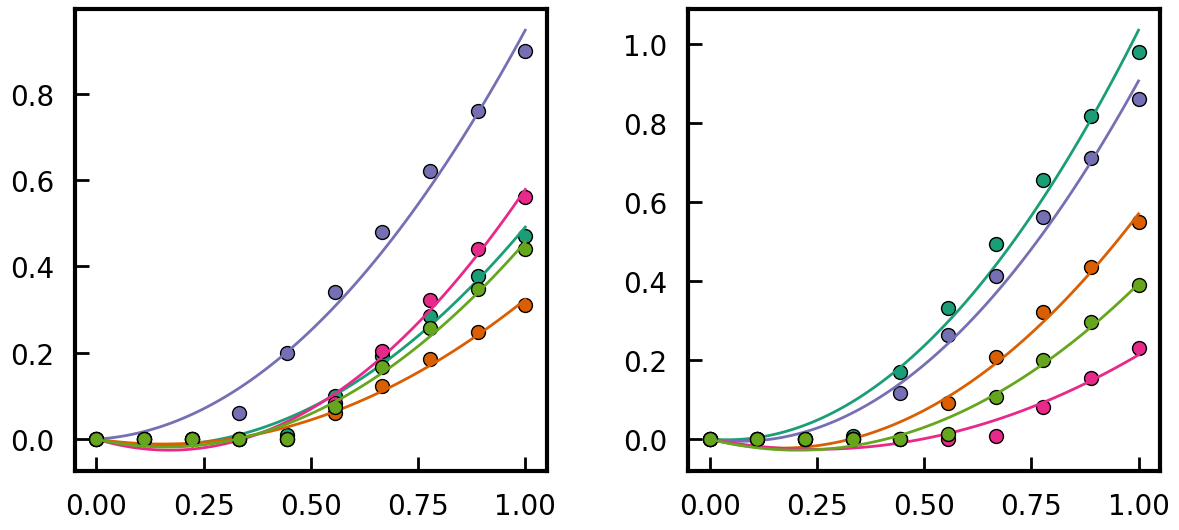

In [23]:
plt.rcParams['figure.figsize']=(14,6)
plt.rcParams['axes.linewidth'] = 3
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=18)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['ytick.major.pad'] = 15
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)

colormap=plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]

gs=gridspec.GridSpec(nrows=1, ncols=2)
gs.update(wspace=0.3, hspace=0.2)

ax0=plt.subplot(gs[0,0])
ax1=plt.subplot(gs[0,1])

hcov_co_100=covdep(0.83,-0.36)
hcov_co_110=covdep(0.56,-0.25)
hcov_co_111=covdep(1.26,-0.36)
hcov_co_311=covdep(1.07,-0.51)
hcov_co_331=covdep(0.82,-0.38)

guess_2nd = (-2.0, 6.0)
h_co_100 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co, hcov_co_100))
h_co_110 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co, hcov_co_110))
h_co_111 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co, hcov_co_111))
h_co_311 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co, hcov_co_311))
h_co_331 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co, hcov_co_331))

print('CO(100):', np.round(h_co_100,3))
print('CO(110):', np.round(h_co_110,3))
print('CO(111):', np.round(h_co_111,3))
print('CO(311):', np.round(h_co_311,3))
print('CO(331):', np.round(h_co_331,3))

hcov_o_100=covdep(1.46,-0.48)
hcov_o_110=covdep(1.03,-0.48)
hcov_o_111=covdep(1.34,-0.48)
hcov_o_311=covdep(0.67,-0.44)
hcov_o_331=covdep(0.85,-0.46)

h_o_100 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co, hcov_o_100))
h_o_110 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co, hcov_o_110))
h_o_111 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co, hcov_o_111))
h_o_311 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co, hcov_o_311))
h_o_331 = fmin(func=minimize_2nd, x0=guess_2nd, args=(theta_co, hcov_o_331))

print('O(100):', np.round(h_o_100,3))
print('O(110):', np.round(h_o_110,3))
print('O(111):', np.round(h_o_111,3))
print('O(311):', np.round(h_o_311,3))
print('O(331):', np.round(h_o_331,3))

poly_covs = np.linspace(0., 1., 101)
poly_hcov_co_100 = fit2nd(h_co_100, poly_covs)
poly_hcov_co_110 = fit2nd(h_co_110, poly_covs)
poly_hcov_co_111 = fit2nd(h_co_111, poly_covs)
poly_hcov_co_311 = fit2nd(h_co_311, poly_covs)
poly_hcov_co_331 = fit2nd(h_co_331, poly_covs)

poly_hcov_o_100 = fit2nd(h_o_100, poly_covs)
poly_hcov_o_110 = fit2nd(h_o_110, poly_covs)
poly_hcov_o_111 = fit2nd(h_o_111, poly_covs)
poly_hcov_o_311 = fit2nd(h_o_311, poly_covs)
poly_hcov_o_331 = fit2nd(h_o_331, poly_covs)


ax0.plot(theta_co, hcov_co_100, markerfacecolor=colors[0], marker='o', linestyle='none',markeredgecolor='k')
ax0.plot(poly_covs, poly_hcov_co_100, color=colors[0], linewidth=2)

ax0.plot(theta_co, hcov_co_110, markerfacecolor=colors[1], marker='o', linestyle='none',markeredgecolor='k')
ax0.plot(poly_covs, poly_hcov_co_110, color=colors[1], linewidth=2)

ax0.plot(theta_co, hcov_co_111, markerfacecolor=colors[2], marker='o', linestyle='none',markeredgecolor='k')
ax0.plot(poly_covs, poly_hcov_co_111, color=colors[2], linewidth=2)

ax0.plot(theta_co, hcov_co_311, markerfacecolor=colors[3], marker='o', linestyle='none',markeredgecolor='k')
ax0.plot(poly_covs, poly_hcov_co_311, color=colors[3], linewidth=2)

ax0.plot(theta_co, hcov_co_331, markerfacecolor=colors[4], marker='o', linestyle='none',markeredgecolor='k')
ax0.plot(poly_covs, poly_hcov_co_331, color=colors[4], linewidth=2)

ax1.plot(theta_co, hcov_o_100, markerfacecolor=colors[0], marker='o', linestyle='none',markeredgecolor='k')
ax1.plot(poly_covs, poly_hcov_o_100, color=colors[0], linewidth=2)

ax1.plot(theta_co, hcov_o_110, markerfacecolor=colors[1], marker='o', linestyle='none',markeredgecolor='k')
ax1.plot(poly_covs, poly_hcov_o_110, color=colors[1], linewidth=2)

ax1.plot(theta_co, hcov_o_111, markerfacecolor=colors[2], marker='o', linestyle='none',markeredgecolor='k')
ax1.plot(poly_covs, poly_hcov_o_111, color=colors[2], linewidth=2)

ax1.plot(theta_co, hcov_o_311, markerfacecolor=colors[3], marker='o', linestyle='none',markeredgecolor='k')
ax1.plot(poly_covs, poly_hcov_o_311, color=colors[3], linewidth=2)

ax1.plot(theta_co, hcov_o_331, markerfacecolor=colors[4], marker='o', linestyle='none',markeredgecolor='k')
ax1.plot(poly_covs, poly_hcov_o_331, color=colors[4], linewidth=2)

